In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
N_particles = 1000  # Fixed number of particles
num_steps = 500  # Number of time steps
trap_size = 3  # Trap radius
delta_t = 1.0  # Time step size

# Trap configurations
trap_depths = [0, 10, 20]  # No traps, deep traps, deeper traps
N_traps = 10  # Few traps randomly placed

In [2]:
# Initialize traps
def initialize_traps(L, N_traps, trap_size):
    traps = []
    for _ in range(N_traps):
        while True:
            trap_center = np.random.randint(0, L, size=2)
            if all(np.linalg.norm(np.array(trap_center) - np.array(t)) > 2 * trap_size for t in traps):
                traps.append(trap_center)
                break
    return np.array(traps)

In [3]:
def initialize_particles(N_particles, L, traps, trap_size):
    positions = np.zeros((N_particles, 2), dtype=int)
    for i in range(N_particles):
        while True:
            pos = np.random.randint(0, L, size=2)
            if not any(np.linalg.norm(pos - trap) <= trap_size for trap in traps):
                positions[i] = pos
                break
    return positions


In [5]:

def is_in_trap(position, traps, trap_size):
    for trap in traps:
        if np.linalg.norm(position - trap) <= trap_size:
            return True
    return False


In [6]:
def simulate_diffusion(L, N_particles, traps, trap_size, trap_depth, num_steps):
    positions = initialize_particles(N_particles, L, traps, trap_size)
    trapping_times = np.zeros(N_particles)
    msd = np.zeros(num_steps)
    survival_prob = np.zeros(num_steps)
    trap_density = np.zeros(num_steps)

    for t in range(num_steps):
        free_particles = 0
        for i in range(N_particles):
            if trapping_times[i] > 0:
                trapping_times[i] -= delta_t
                continue

            move = np.random.choice(['up', 'down', 'left', 'right'])
            if move == 'up':
                positions[i][0] = (positions[i][0] + 1) % L
            elif move == 'down':
                positions[i][0] = (positions[i][0] - 1) % L
            elif move == 'right':
                positions[i][1] = (positions[i][1] + 1) % L
            elif move == 'left':
                positions[i][1] = (positions[i][1] - 1) % L

            if is_in_trap(positions[i], traps, trap_size):
                trapping_times[i] = trap_depth
            else:
                free_particles += 1

        msd[t] = np.mean(positions[:, 0]**2 + positions[:, 1]**2)
        survival_prob[t] = free_particles / N_particles
        trap_density[t] = np.sum(trapping_times > 0) / N_particles

    return msd, survival_prob, np.mean(trap_density)

In [7]:
# Main loop for different trap depths
msd_results = {}
survival_results = {}
trap_densities = []

traps = initialize_traps(L, N_traps, trap_size)

for depth in trap_depths:
    msd, survival_prob, avg_trap_density = simulate_diffusion(
        L, N_particles, traps, trap_size, depth, num_steps
    )
    msd_results[depth] = msd
    survival_results[depth] = survival_prob
    trap_densities.append(avg_trap_density)

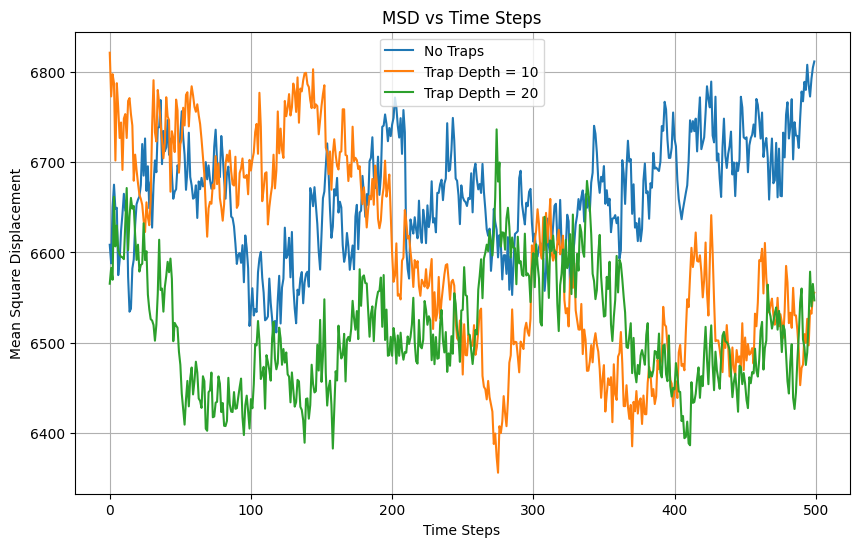

In [8]:
plt.figure(figsize=(10, 6))
for depth, msd in msd_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(msd, label=label)
plt.title("MSD vs Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Mean Square Displacement")
plt.legend()
plt.grid(True)
plt.show()

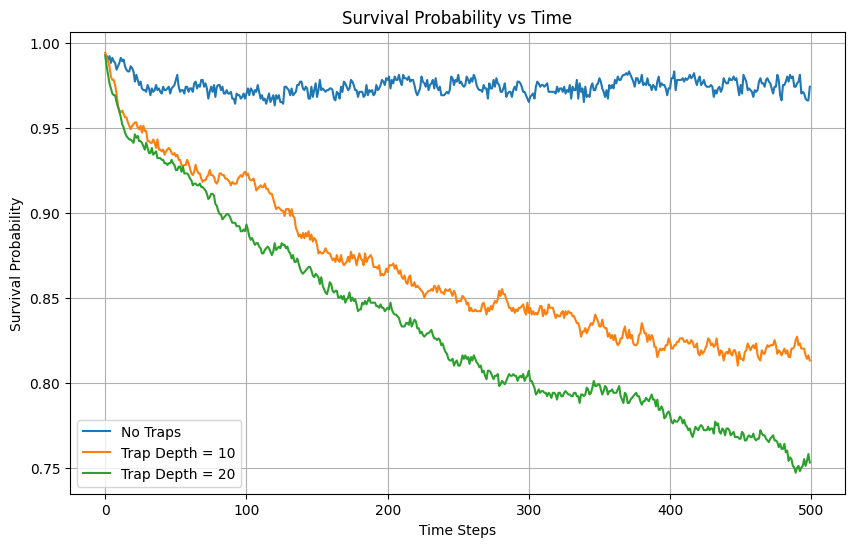

In [9]:
plt.figure(figsize=(10, 6))
for depth, survival_prob in survival_results.items():
    label = f"Trap Depth = {depth}" if depth > 0 else "No Traps"
    plt.plot(survival_prob, label=label)
plt.title("Survival Probability vs Time")
plt.xlabel("Time Steps")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


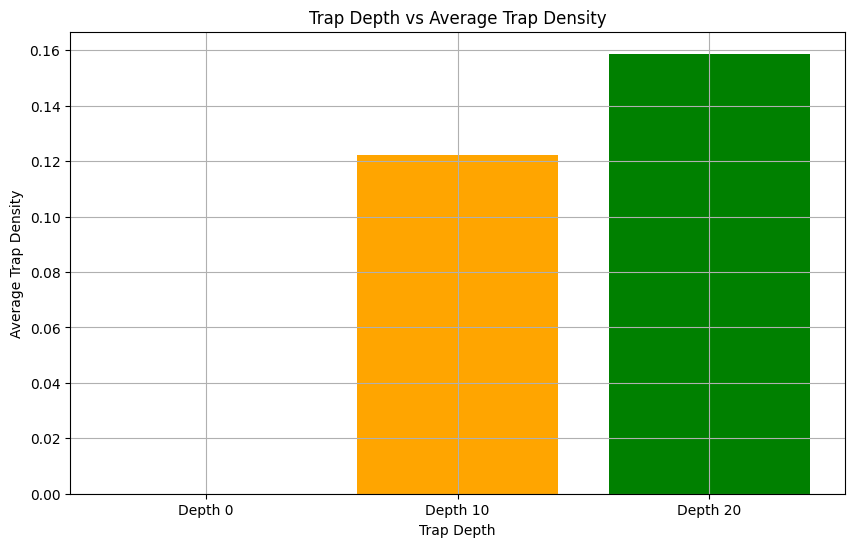

In [10]:
plt.figure(figsize=(10, 6))
plt.bar([f"Depth {d}" for d in trap_depths], trap_densities, color=['blue', 'orange', 'green'])
plt.title("Trap Depth vs Average Trap Density")
plt.xlabel("Trap Depth")
plt.ylabel("Average Trap Density")
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
N_particles = 1000  # Fixed number of particles
num_steps = 500  # Number of time steps
trap_size = 3  # Trap radius
delta_t = 1.0  # Time step size

# Trap configurations
trap_depths = [10, 20]  # Deep traps and deeper traps
N_traps = 10  # Few traps randomly placed

# Initialize traps
def initialize_traps(L, N_traps, trap_size):
    traps = []
    for _ in range(N_traps):
        while True:
            trap_center = np.random.randint(0, L, size=2)
            if all(np.linalg.norm(np.array(trap_center) - np.array(t)) > 2 * trap_size for t in traps):
                traps.append(trap_center)
                break
    return np.array(traps)

# Initialize particles
def initialize_particles(N_particles, L, traps, trap_size):
    positions = np.zeros((N_particles, 2), dtype=int)
    for i in range(N_particles):
        while True:
            pos = np.random.randint(0, L, size=2)
            if not any(np.linalg.norm(pos - trap) <= trap_size for trap in traps):
                positions[i] = pos
                break
    return positions

# Check if a particle is in a trap
def is_in_trap(position, traps, trap_size):
    for trap in traps:
        if np.linalg.norm(position - trap) <= trap_size:
            return True
    return False

# Simulate diffusion
def simulate_diffusion(L, N_particles, traps, trap_size, trap_depth, num_steps):
    positions = initialize_particles(N_particles, L, traps, trap_size)
    trapping_times = np.zeros(N_particles)
    msd = np.zeros(num_steps)
    trap_density = np.zeros(num_steps)

    initial_positions = positions.copy()

    for t in range(num_steps):
        for i in range(N_particles):
            if trapping_times[i] > 0:
                trapping_times[i] -= delta_t
                continue

            move = np.random.choice(['up', 'down', 'left', 'right'])
            if move == 'up':
                positions[i][0] = (positions[i][0] + 1) % L
            elif move == 'down':
                positions[i][0] = (positions[i][0] - 1) % L
            elif move == 'right':
                positions[i][1] = (positions[i][1] + 1) % L
            elif move == 'left':
                positions[i][1] = (positions[i][1] - 1) % L

            if is_in_trap(positions[i], traps, trap_size):
                trapping_times[i] = trap_depth

        displacement = positions - initial_positions
        msd[t] = np.mean(displacement[:, 0]**2 + displacement[:, 1]**2)
        trap_density[t] = np.sum(trapping_times > 0) / N_particles

    return msd, np.mean(trap_density)

# Main loop for different trap depths
msd_results = {}
trap_densities = []
traps = initialize_traps(L, N_traps, trap_size)

# No trap case
msd_no_traps = simulate_diffusion(L, N_particles, [], trap_size, 0, num_steps)[0]
msd_results["No Traps"] = msd_no_traps

# Trapped cases
for depth in trap_depths:
    msd, avg_trap_density = simulate_diffusion(L, N_particles, traps, trap_size, depth, num_steps)
    msd_results[f"Trap Depth = {depth}"] = msd
    trap_densities.append(avg_trap_density)

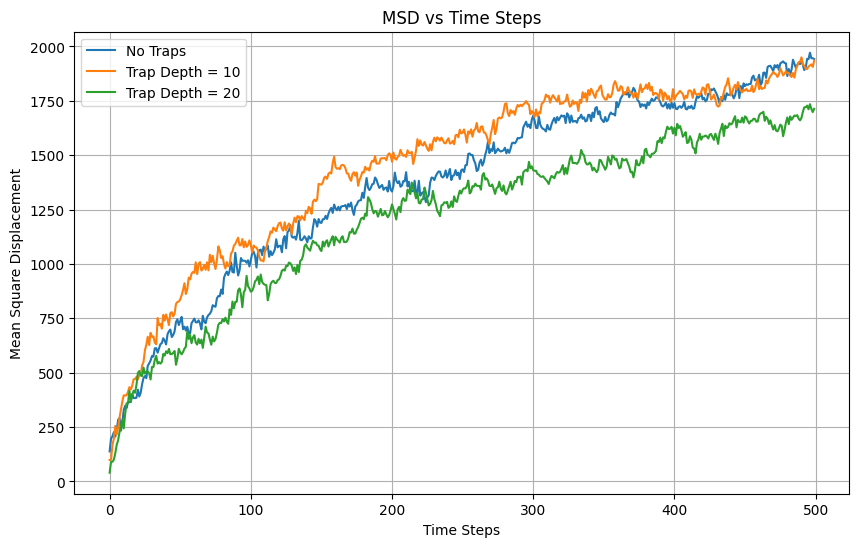

In [12]:
# MSD vs Time Plot
plt.figure(figsize=(10, 6))
for label, msd in msd_results.items():
    plt.plot(msd, label=label)
plt.title("MSD vs Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Mean Square Displacement")
plt.legend()
plt.grid(True)
plt.show()

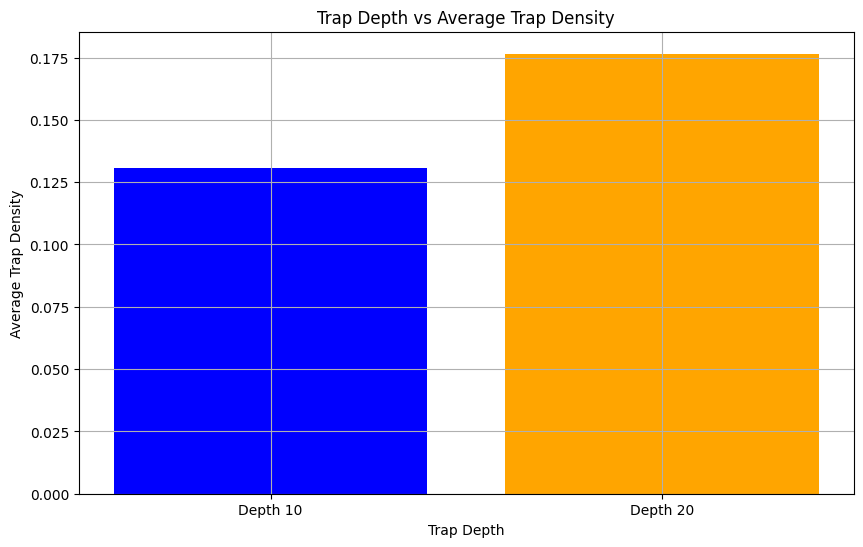

In [13]:
# Trap Depth vs Average Trap Density (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar([f"Depth {d}" for d in trap_depths], trap_densities, color=['blue', 'orange'])
plt.title("Trap Depth vs Average Trap Density")
plt.xlabel("Trap Depth")
plt.ylabel("Average Trap Density")
plt.grid(True)
plt.show()

# HANDMADE CODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [53]:
class particle:
    def __init__(self, x, y, trapper=None, trap_time = 0):
        self.x = x
        self.y = y
        self.trapper = trapper
        self.trap_time = trap_time
    
class trap:
    def __init__(self, x, y, radius, depth, num_particles = 0):
        self.x = x
        self.y = y
        self.radius = radius
        self.depth = depth
        self.num_particles = num_particles
        self.density = 0

def make_traps(trap_rad, trap_depth, num_traps):
    arr = []
    for i in range(num_traps):
        new_trap = trap(0, 0, trap_rad, trap_depth)
        arr.append(new_trap)
    print("made traps")
    return arr

def scatter_traps(arr_traps, board_size):
    for trap in arr_traps:
        x_new = 0
        y_new = 0
        done = False
        while True:
            x_new = random.randint(0,board_size)
            y_new = random.randint(0,board_size)
            trap_center = (x_new,y_new)
            for tr in arr_traps:   
                norm = (tr.x - x_new)**2 + (tr.y - y_new)**2
                if math.sqrt(norm) > tr.radius + 2:
                    done = True
                    print("scattered to (" + str(x_new) + ", " + str(y_new) + ")")
                    break
            if done:
                break     
        trap.x = x_new
        trap.y = y_new
    return arr_traps

def is_trapped(part, traps):
    for trap in traps:
        norm = (part.x - trap.x)**2 + (part.y - trap.y)**2
        if math.sqrt(norm) <= trap.radius:
            part.trapper = trap
            part.trap_time = trap.depth
            trap.density += 1
            return True
    return False

def make_particles(num_particles, arr_traps, board):
    arr = []
    for i in range(num_particles):
        done = False
        while True:
            position = np.random.randint(0, board, size=2)
            for tr in arr_traps:
                norm = (tr.x - position[0])**2 + (tr.y - position[1])**2
                if math.sqrt(norm) > tr.radius * 2:
                    done = True
                    arr.append(particle(position[0],position[1]))
                    break
            if done:
                break
    return arr



    




In [12]:
def diffuse(arr_particles, arr_traps, t_steps, board, height):

    msd = [[0]*board]*board
    avr_trap_density = [0]*board
    survival_prob = [0]*board
    avr_time_trapped = [[0]*board]*board

    directions = ['up','down','left','right']
    free_particles = len(arr_particles)
    initial_positions = [[part.x,part.y] for part in arr_particles]
    number_density = len(arr_traps)/(board*board*height)

    for i in range(len(t_steps)):
        Surviving_Particles = 0
        trap_counter = 0
        for j in range(len(arr_particles)):
            part = arr_particles[j]
            if part.trap_time > 0:
                part.trap_time -= 1
                trap_counter += 1
                continue
            else:
                if part.trapper is not None:
                    trp = part.trapper
                    part.trapper = None
                    trp.density -= 0
            
            mv = random.choice(directions)
            if mv == "up":
                part.y += 1
            elif mv == "down":
                part.y -= 1
            elif mv == "left":
                part.x -= 1
            elif mv == "right":
                part.x += 1
            
            is_trapped(part,arr_traps)
            
            #msd calculation
            init_x = initial_positions[j][0]
            init_y = initial_positions[j][1]
            msd[i][j] = (part.x-init_x)**2 + (part.y-init_y)**2

            if part.trapper is not None:
                Surviving_Particles += 1
        #rectangular box is used for the board, that is as tall as the diameter of the traps
        #survival probability(density outside)
        survival_prob[j] = Surviving_Particles/(board*board*height)
        
        #average trap density
        for trap in arr_traps:
            if trap.density > -1:
                avr_trap_density[j] += trap.density/((number_density * ((trap.radius)**3) * 4/3 * math.pi)/len(arr_traps))
            else:
                print("Boomin Chattin")

yapacaklarım

parametreleri oturtacam:
board = bütün spacein bi köşe uzunluğu
N_particles
t_steps
trap_radius
trap_depth
n_traps



plotları yazacam
msd vs time steps for differing trap densities,

msd vs time steps for differing trap depths,

msd vs time step for no trap vs low trap density, high depth vs high trap density low depth vs high trap density high depth



equationları yazacam


In [56]:
# Parameters

board = 100
N_particles = 1000
t_steps = 500

trap_rad = 3
trap_depth = 10
num_traps = 10

# SAME DENSITY, DIFFERENT DEPTH
# trap_depth = 10, trap density = number of traps / (board^2)

traps_1 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_1, board)
particles_1 = make_particles(N_particles, traps, board)

trap_depth = 20

traps_2 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_2, board)
particles_2 = make_particles(N_particles, traps, board)

trap_depth = 30

traps_3 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_3, board)
particles_3 = make_particles(N_particles, traps, board)

# SAME DEPTH, DIFFERENT DENSITIES

trap_depth = 10
num_traps = 20

traps_4 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_4, board)
particles_4 = make_particles(N_particles, traps, board)

num_traps = 30

traps_5 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_5, board)
particles_5 = make_particles(N_particles, traps, board)
# HIGHEST DEPTH, HIGHEST DENSITY

trap_depth = 30
num_traps = 30

traps_6 = make_traps(trap_rad, trap_depth, num_traps)
scatter_traps(traps_6, board)
particles_6 = make_particles(N_particles, traps, board)

# NO TRAPS
particles_7 = make_particles(N_particles, [trap(0,0,0,0,0)], board)


made traps
scattered to (98, 9)
scattered to (94, 46)
scattered to (95, 44)
scattered to (95, 6)
scattered to (96, 4)
scattered to (41, 53)
scattered to (100, 76)
scattered to (40, 95)
scattered to (18, 70)
scattered to (7, 84)
made traps
scattered to (75, 56)
scattered to (43, 65)
scattered to (30, 0)
scattered to (36, 93)
scattered to (28, 49)
scattered to (54, 10)
scattered to (1, 33)
scattered to (69, 73)
scattered to (11, 92)
scattered to (49, 49)
made traps
scattered to (2, 90)
scattered to (57, 42)
scattered to (79, 37)
scattered to (56, 7)
scattered to (87, 88)
scattered to (29, 41)
scattered to (32, 82)
scattered to (28, 90)
scattered to (74, 9)
scattered to (0, 78)
made traps
scattered to (81, 10)
scattered to (82, 1)
scattered to (66, 28)
scattered to (100, 80)
scattered to (43, 28)
scattered to (19, 47)
scattered to (88, 90)
scattered to (25, 35)
scattered to (98, 0)
scattered to (18, 90)
scattered to (82, 32)
scattered to (8, 14)
scattered to (41, 87)
scattered to (34, 50)

In [49]:
msd_results = {}
trap_density_results = {}

for i in range(7):
    msd, trap_density = diffuse(particles[i], traps[i], t_steps, board, height)

51 30
93 59
27 18
53 34
84 79
27 75
18 10
17 75
72 16
36 34
92 74
27 65
83 83
24 29
25 60
74 71
3 22
42 90
74 96
8 12
37 13
85 85
84 42
21 49
58 94
15 29
32 4
8 18
82 15
54 54
70 83
61 57
62 11
21 91
8 37
93 46
41 62
64 65
99 93
71 21
44 54
11 99
91 57
35 10
84 70
75 30
40 7
68 75
16 56
98 20
8 81
89 83
79 6
87 36
91 90
88 19
44 93
69 46
34 63
10 84
23 89
49 98
34 86
5 90
9 86
76 78
51 99
8 82
83 26
47 91
39 50
73 3
65 78
65 0
81 60
49 91
43 72
61 10
23 98
65 83
60 22
44 19
20 5
4 63
64 32
85 54
87 60
94 13
62 77
34 84
33 35
36 15
34 59
25 96
60 61
5 28
30 14
59 44
97 21
56 3
8 48
15 18
24 69
23 98
77 88
36 56
61 80
74 66
61 41
26 54
22 90
98 21
97 94
99 61
89 40
57 56
8 91
69 70
24 91
73 92
97 37
43 66
54 4
12 15
7 70
94 42
66 25
75 61
20 14
35 4
30 25
12 84
10 12
28 94
3 25
11 74
9 7
36 35
17 16
17 90
72 87
51 56
38 73
86 45
18 43
31 72
63 9
26 93
15 88
32 77
42 78
40 1
45 98
7 7
61 11
46 87
35 66
95 3
64 82
88 34
1 48
9 71
98 19
35 23
34 18
56 88
41 29
82 76
93 80
44 0
78 85
86 73
5